In [2]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [3]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/MLProject_KenyaFinancial

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MLProject_KenyaFinancial


In [4]:
#X and Y paths based on data

x_path = "/content/drive/MyDrive/MLProject_KenyaFinancial/clean_data/XoheImp.csv" 
y_path = "/content/drive/MyDrive/MLProject_KenyaFinancial/clean_data/Y.csv"

In [5]:
X = pd.read_csv(x_path)
y = pd.read_csv(y_path)

In [7]:
#Split training and validation set
%run Splitting_data.ipynb
X_train, X_val, y_train, y_val = training_set(x_path, y_path)

The scikit-learn version is 1.0.2.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial # Change path to yours'
/content/drive/MyDrive/MLProject_KenyaFinancial


In [ ]:
#Random Forest (50 trees)

In [14]:
forest50 = RandomForestClassifier(n_estimators = 50)
forest50.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(n_estimators=50)

In [15]:
y_pred_val50 = forest50.predict(X_val)

In [ ]:
#Print Random Forest (50) results
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_val50))
print("F1:",metrics.f1_score(y_val, y_pred_val50, average="weighted"))
print("Matthew's Correlation Coefficient:",metrics.matthews_corrcoef(y_val, y_pred_val50))

Accuracy: 0.9852438129267246
F1: 0.9849418021500552
Matthew's Correlation Coefficient: 0.9354795633645486


In [ ]:
#Label encoder for ROC AUC
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
trans_y_pred_val50 = le.fit(y_pred_val50)

In [ ]:
roc_auc_score(y_val, trans_y_pred_val50, average = "macro", multi_class = "ovr")

In [ ]:
#Random Forest (100 trees)

In [14]:
forest100 = RandomForestClassifier(n_estimators = 100)
forest100.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


KeyboardInterrupt: ignored

In [ ]:
y_pred_val100 = forest100.predict(X_val)

In [ ]:
#Print Random Forest (100) Results
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_val100))
print("F1:",metrics.f1_score(y_val, y_pred_val100, average="weighted"))
print("Matthew's Correlation Coefficient:",metrics.matthews_corrcoef(y_val, y_pred_val100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # This is added back by InteractiveShellApp.init_path()


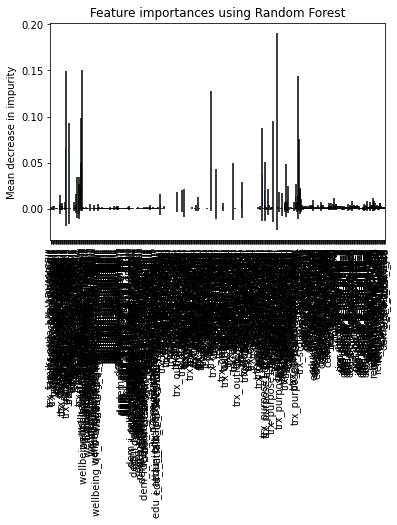

In [21]:
#Variable importance graph

importances = forest50.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest50.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Random Forest")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

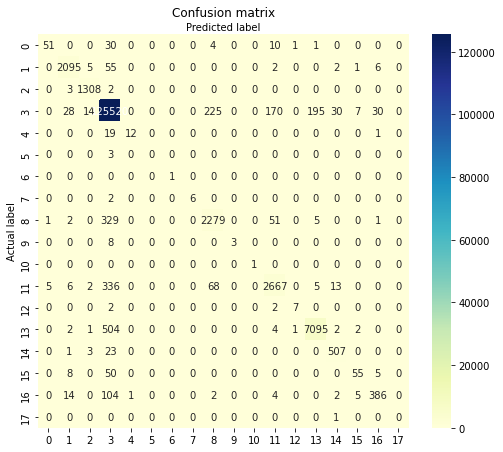

In [20]:
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_val, y_pred_val50)

# Create heatmap from the confusion matrix
%matplotlib inline
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]

In [ ]:
#Score tabulation

In [ ]:
#Must fill in values

Scores = {}
Scores[50] = {"Accuracy" : 0.985181492099104, "F1" : 0.9848746348842544, "MCC" : 0.9352177479090404}

In [ ]:
Scores[100] = {"Accuracy": 0.9852438129267246, "F1": 0.9849617541345709, "MCC": 0.9355360606936755}

In [ ]:
ScoresDF = pd.DataFrame([[50, 0.985181492099104, 0.9848746348842544, 0.9352177479090404],[100, 0.9852438129267246, 0.9849617541345709, 0.9355360606936755]], columns = ["Trees", "Accuracy", "F1", "MCC"])

In [ ]:
ScoresDF.to_csv("treeScores.csv", sep=";")

In [ ]:
plt.plot(ScoresDF.Trees, ScoresDF.Accuracy, label = "Accuracy")
plt.plot(ScoresDF.Trees, ScoresDF.F1, label = "F1 score")
plt.plot(ScoresDF.Trees, ScoresDF.MCC, label = "Matthew's Correlation Coefficient")
plt.legend()
plt.show()

In [ ]:
# Define Parameters
#max_depth=[2, 8, 16]
n_estimators = [25, 50, 100]
param_grid = dict(n_estimators=n_estimators)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

In [ ]:
# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.98339663 0.98370651 0.98378095], using {'n_estimators': 100}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,110.905051,4.112263,2.369814,0.299426,25,{'n_estimators': 25},0.983537,0.983485,0.983269,0.983684,0.983009,0.983397,0.000235,3
1,215.456196,6.651246,4.307215,0.264041,50,{'n_estimators': 50},0.984091,0.983874,0.983797,0.983260,0.983511,0.983707,0.000290,2
2,443.802081,10.772415,8.062780,0.201652,100,{'n_estimators': 100},0.984074,0.983736,0.983788,0.983753,0.983554,0.983781,0.000167,1
